# EX5 나랑 닮은 연예인 찾기
*******************************************

- 폴더 생성 후 이미지 파일 업로드
#### mkdir -p ~/aiffel/face_embedding
#### ln -s ~/data ~/aiffel/face_embedding/images

**************
## 사진 모으기
- 1. 내 사진 찍기
- 2. 비교할 연예인 사진 모으기

************************
- 업로드한 이미지 확인 (2x3)

file_list: ['강석현2.jpg', 'dongwon.jpg', 'siwan.jpg', 'joker.jpg', 'juneyul.jpg', 'dongseok.jpg', 'king.jpg', 'sechan.JPG', 'cruze.jpg', 'seojeon.JPG', 'jinho.JPG', 'Lee.jpg', 'haejin.jpg', 'tomhadi.jpg', 'insung.jpg', 'jeongseok.jpg', 'sieon.jpg', 'ha.jpg', 'kim.jpg', '강석현1.jpg', 'haein.jpg', 'moon.jpg', '강석현.jpg', 'zisub.JPG']


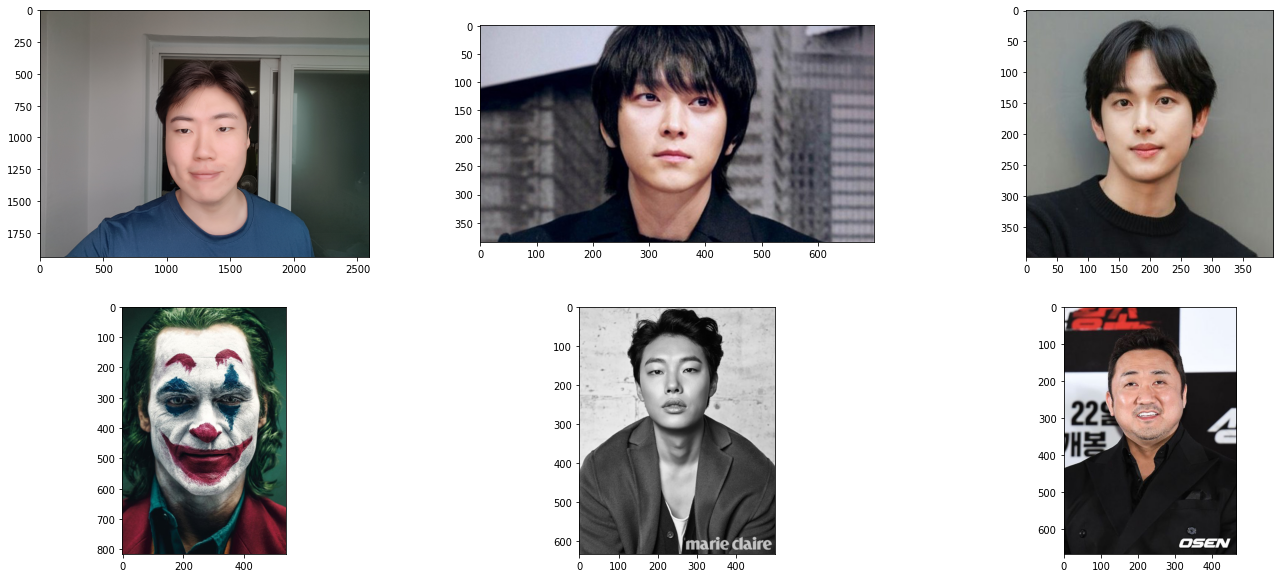

In [58]:
import os

dir_path = os.getenv('HOME')+'/aiffel/face_embedding1/images'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

import matplotlib.pyplot as plt
import matplotlib.image as img

#Set figsize here
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
  image = img.imread(dir_path+'/'+file_list[i])
  ax.imshow(image)
plt.show()

fig.tight_layout()

## 얼굴 잘라내기

In [59]:
import face_recognition
import os

def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

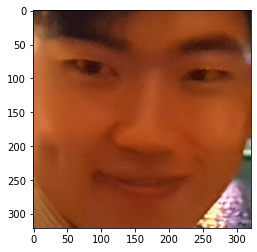

In [62]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding1/images/강석현1.jpg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

## 임베딩 벡터 구하기

In [88]:
image_file = os.path.join(dir_path, '강석현1.jpg')
face = get_cropped_face(image_file) 

# 얼굴 임베딩 벡터를 구하기
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[]

- 결과는 나오지 않았다, 영역까지는 인식을 하지만 화질상의 문제인지 임베딩 벡터는 나오지 않음
******************
### 사진 변경(명암이 잘 드러나는 고화질 사진)

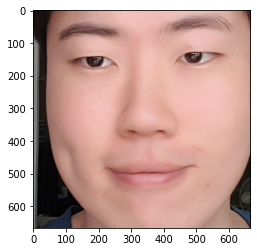

In [60]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding1/images/강석현2.jpg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

In [61]:
image_file = os.path.join(dir_path, '강석현2.jpg')
face = get_cropped_face(image_file)  

def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-6.65266365e-02,  5.31872101e-02,  6.86584488e-02, -8.71868134e-02,
        -1.51340693e-01, -4.40740585e-02, -9.16230530e-02, -1.36039063e-01,
         8.62024128e-02, -1.78520992e-01,  2.36517489e-01, -3.62504870e-02,
        -2.13127330e-01, -7.27814883e-02, -6.66503310e-02,  1.93232536e-01,
        -1.91359162e-01, -8.78337771e-02, -2.01251879e-02,  5.19981980e-02,
         9.97572020e-02,  1.86774954e-02,  2.28042863e-02,  1.96067002e-02,
        -9.30837244e-02, -3.09013128e-01, -1.36225834e-01, -3.23374569e-02,
        -3.56857665e-02, -5.74759468e-02, -3.09827290e-02,  2.31784506e-04,
        -1.45416155e-01,  2.96053514e-02,  6.33832533e-03,  5.96852079e-02,
        -1.52547024e-02, -9.98369455e-02,  1.57933444e-01,  1.90407783e-03,
        -2.39298895e-01,  4.98516634e-02, -9.29293875e-03,  2.30212852e-01,
         1.64054126e-01, -2.55232155e-02,  5.80203235e-02, -1.32635459e-01,
         1.55669957e-01, -2.03420267e-01,  2.13342272e-02,  1.40328020e-01,
         4.9

- images 폴더 안의 얼굴만 잘라낸 사진 파일들의 임베딩 벡터들을 구하기.

In [171]:
embedding_dict = {} # 각 사진들의 임베딩 저장
cropped_face_dict = {} # 얼굴 이미지 저장


def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        
        image = face_recognition.load_image_file(img_path)
        face_locations = face_recognition.face_locations(image)
        
        if not face_locations: # 얼굴 위치를 찾지 못하는 경우
            print(f"Cannot crop the image: {file}")
            continue

        else: # 얼굴 부분만 잘라낸다
            a, b, c, d = face_locations[0]
            cropped_face = image[a:c, d:b, :]
        embedding = face_recognition.face_encodings(cropped_face)    
        
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  
        # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
        # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
            cropped_face_dict[os.path.splitext(file)[0]] = cropped_face
        
    return embedding_dict

In [172]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['강석현']

array([-0.07439513,  0.08305268,  0.05264307, -0.06377112, -0.15537031,
       -0.02499143, -0.1065085 , -0.11466639,  0.0897807 , -0.14239495,
        0.1749053 , -0.03998952, -0.20938388, -0.07182943, -0.0992614 ,
        0.183249  , -0.1677487 , -0.1387115 , -0.03383651,  0.01494145,
        0.10784033,  0.05126243,  0.01885476,  0.00592803, -0.11278524,
       -0.31706837, -0.11444741, -0.0302426 , -0.05099966, -0.05502059,
       -0.06546067,  0.07816624, -0.14932582,  0.00369692,  0.00243595,
        0.04301634, -0.00831338, -0.08037101,  0.14430408,  0.01862986,
       -0.22810842,  0.03711922,  0.05080222,  0.21313177,  0.19698872,
       -0.02053847,  0.03415953, -0.15548438,  0.11202181, -0.18911883,
       -0.01323538,  0.18465364,  0.04678401,  0.06055886, -0.00387345,
       -0.11037318,  0.05103108,  0.10115602, -0.0812553 ,  0.0244736 ,
        0.07963401, -0.09778784, -0.04402475, -0.10987509,  0.20293914,
        0.05731344, -0.11687387, -0.21018095,  0.11532835, -0.12

*******************
- 조커와 같은 분장된 얼굴도 임베딩 벡터가 되는지 해보았다.

array([-0.06671838,  0.01107534,  0.02286434, -0.02051967, -0.08810586,
       -0.12000784,  0.02355314, -0.04769411,  0.17416947, -0.0320654 ,
        0.26031768,  0.04981986, -0.23188564, -0.03140233, -0.02992889,
        0.11804827, -0.10086637, -0.05392187, -0.13054676, -0.09966678,
        0.03083065,  0.06540955,  0.04730295, -0.022942  , -0.08656954,
       -0.27454576, -0.1421659 , -0.01641122,  0.04286171, -0.06391011,
        0.07530736,  0.07583926, -0.25506526, -0.18084657,  0.12157659,
        0.02609665, -0.07389878, -0.03461075,  0.20189786,  0.12511568,
       -0.16285492,  0.04573758,  0.09625682,  0.2989684 ,  0.15557776,
        0.07913502, -0.00740748, -0.11244074,  0.08656205, -0.19660951,
        0.0801931 ,  0.11173309,  0.1683232 ,  0.05412314,  0.09676942,
       -0.14894015,  0.05337348,  0.13904406, -0.24090804,  0.07041059,
        0.09412787, -0.07551859, -0.02679263, -0.06264977,  0.16961604,
        0.07420469, -0.10181313, -0.13831843,  0.19864856, -0.12

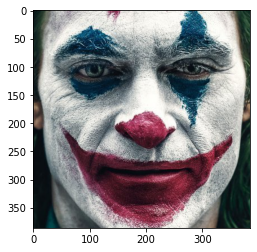

In [173]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding1/images/joker.jpg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['joker']

In [174]:
embedding_dict['dongwon']

array([-0.03416138,  0.06386186, -0.01451718, -0.0406614 , -0.13152376,
       -0.02072504, -0.05941718, -0.11789778,  0.09159959, -0.07194284,
        0.1982805 , -0.03177089, -0.2270813 , -0.09483882, -0.03483291,
        0.12714422, -0.14601682, -0.17718451, -0.01349593, -0.00327329,
        0.14100179,  0.1025838 ,  0.00840356,  0.02737142, -0.16871333,
       -0.26980734, -0.11508195, -0.07061986, -0.02296569, -0.04867754,
       -0.05890538,  0.06847144, -0.2089175 , -0.05367669,  0.13189846,
        0.14472526,  0.04311111, -0.02665921,  0.13187146,  0.02426732,
       -0.20746294,  0.0690733 ,  0.13353249,  0.23102677,  0.20395944,
        0.01780449, -0.00766893, -0.15211828,  0.11540776, -0.12580921,
        0.07111637,  0.15325981,  0.13727765,  0.08639213,  0.00912785,
       -0.09720804,  0.05894691,  0.11822557, -0.16251519,  0.0185614 ,
        0.13391072, -0.09133378, -0.01364421, -0.06428118,  0.17813475,
       -0.01726272, -0.10028853, -0.25926375,  0.06509865, -0.21

In [175]:
embedding_dict['haejin']

array([-6.44057840e-02,  1.14063114e-01,  1.13714240e-01, -1.92314573e-02,
       -1.05027959e-01, -3.26139480e-02, -1.43951237e-01, -1.73197314e-01,
        7.31488764e-02, -6.24084063e-02,  2.53208518e-01,  2.93285288e-02,
       -1.34963930e-01, -1.12384923e-01, -5.21590561e-02,  1.68754190e-01,
       -1.98063284e-01, -1.28795683e-01, -3.71054336e-02,  2.60988623e-03,
        5.32739311e-02, -4.86778701e-03,  5.91621585e-02, -3.24188024e-02,
       -8.96842778e-02, -3.12783003e-01, -8.27131718e-02, -7.40269795e-02,
        5.84598146e-02,  4.28318232e-02, -6.63381144e-02, -1.86168458e-02,
       -2.53693610e-01, -2.77901087e-02,  4.45129443e-03,  2.04706341e-02,
        7.73791037e-03, -8.76221806e-02,  1.38673767e-01, -6.54863268e-02,
       -2.36538678e-01,  6.37957826e-02,  3.89130637e-02,  1.37462869e-01,
        2.13232189e-01, -3.36665027e-02,  9.02259275e-02, -1.14984907e-01,
        7.73801431e-02, -1.15514517e-01,  5.56056201e-02,  1.58379287e-01,
        7.83313885e-02,  

In [176]:
import numpy as np

A = np.array([-6.44057840e-02,  1.14063114e-01,  1.13714240e-01, -1.92314573e-02,
       -1.05027959e-01, -3.26139480e-02, -1.43951237e-01, -1.73197314e-01,
        7.31488764e-02, -6.24084063e-02,  2.53208518e-01,  2.93285288e-02,
       -1.34963930e-01, -1.12384923e-01, -5.21590561e-02,  1.68754190e-01,
       -1.98063284e-01, -1.28795683e-01, -3.71054336e-02,  2.60988623e-03,
        5.32739311e-02, -4.86778701e-03,  5.91621585e-02, -3.24188024e-02,
       -8.96842778e-02, -3.12783003e-01, -8.27131718e-02, -7.40269795e-02,
        5.84598146e-02,  4.28318232e-02, -6.63381144e-02, -1.86168458e-02,
       -2.53693610e-01, -2.77901087e-02,  4.45129443e-03,  2.04706341e-02,
        7.73791037e-03, -8.76221806e-02,  1.38673767e-01, -6.54863268e-02,
       -2.36538678e-01,  6.37957826e-02,  3.89130637e-02,  1.37462869e-01,
        2.13232189e-01, -3.36665027e-02,  9.02259275e-02, -1.14984907e-01,
        7.73801431e-02, -1.15514517e-01,  5.56056201e-02,  1.58379287e-01,
        7.83313885e-02,  2.12951116e-02,  8.85836221e-03, -1.51227340e-01,
       -8.91169161e-03,  1.16779126e-01, -5.26549369e-02,  1.46694547e-02,
        1.25308409e-01,  1.80451162e-02, -2.84469128e-02, -1.21401437e-01,
        1.71639815e-01,  6.56578541e-02, -9.66419876e-02, -2.43818238e-01,
        1.13006793e-01, -8.86032209e-02, -5.25250994e-02,  5.38505390e-02,
       -1.83217421e-01, -1.76000938e-01, -2.99562693e-01,  2.55350992e-02,
        3.52451742e-01,  1.00132823e-01, -2.26133391e-01,  5.86195514e-02,
       -9.92667601e-02,  3.23149934e-02,  9.55637693e-02,  8.18109065e-02,
        3.95303629e-02,  5.63975498e-02, -1.14783309e-01, -2.84526311e-02,
        2.27728605e-01, -6.70094490e-02, -9.26157739e-03,  2.35535979e-01,
       -1.62845161e-02,  1.38012404e-02, -1.48040242e-04,  3.89595181e-02,
       -2.80785635e-02,  7.14194700e-02, -1.27875254e-01,  4.33184505e-02,
       -7.22449552e-03, -3.80589217e-02, -2.12538373e-02,  1.02686249e-01,
       -1.16319314e-01,  7.21801817e-02, -1.08884955e-02,  1.05534784e-01,
        1.87185630e-02,  2.30766274e-03, -1.06939219e-01, -9.33047011e-02,
        1.31168514e-01, -1.90114349e-01,  2.27255985e-01,  1.64639831e-01,
        6.55639321e-02,  9.90390033e-02,  1.50204375e-01,  1.28992587e-01,
       -2.20384561e-02, -5.52020781e-03, -1.93424925e-01, -4.12739962e-02,
        3.54900211e-02, -7.18538463e-02,  3.03906128e-02,  7.03249127e-02])


B = np.array([-0.07439513,  0.08305268,  0.05264307, -0.06377112, -0.15537031,
       -0.02499143, -0.1065085 , -0.11466639,  0.0897807 , -0.14239495,
        0.1749053 , -0.03998952, -0.20938388, -0.07182943, -0.0992614 ,
        0.183249  , -0.1677487 , -0.1387115 , -0.03383651,  0.01494145,
        0.10784033,  0.05126243,  0.01885476,  0.00592803, -0.11278524,
       -0.31706837, -0.11444741, -0.0302426 , -0.05099966, -0.05502059,
       -0.06546067,  0.07816624, -0.14932582,  0.00369692,  0.00243595,
        0.04301634, -0.00831338, -0.08037101,  0.14430408,  0.01862986,
       -0.22810842,  0.03711922,  0.05080222,  0.21313177,  0.19698872,
       -0.02053847,  0.03415953, -0.15548438,  0.11202181, -0.18911883,
       -0.01323538,  0.18465364,  0.04678401,  0.06055886, -0.00387345,
       -0.11037318,  0.05103108,  0.10115602, -0.0812553 ,  0.0244736 ,
        0.07963401, -0.09778784, -0.04402475, -0.10987509,  0.20293914,
        0.05731344, -0.11687387, -0.21018095,  0.11532835, -0.12672305,
       -0.12427115,  0.0332364 , -0.17926666, -0.18247169, -0.28196165,
       -0.00093098,  0.32819083,  0.13546745, -0.21748796,  0.08934413,
       -0.06841118,  0.01945889,  0.09701519,  0.1646169 , -0.02157368,
        0.03904617, -0.11902351,  0.0188361 ,  0.22744514, -0.1036295 ,
       -0.01561816,  0.26693031,  0.03417811,  0.10436098,  0.05028012,
        0.02244558, -0.06733124,  0.03556301, -0.11849399,  0.02017144,
        0.07758245, -0.08442066, -0.02397437,  0.12884474, -0.08943285,
        0.14296128, -0.04158878,  0.06744286,  0.01448914, -0.04999828,
       -0.10353372, -0.05527126,  0.12948902, -0.16071667,  0.17687032,
        0.15477985,  0.07559852,  0.1128709 ,  0.17677228,  0.1290902 ,
       -0.04306931, -0.01126457, -0.18941267, -0.01219331,  0.11388964,
       -0.04211129,  0.04250386,  0.0178665])

C = np.array([-6.65266365e-02,  5.31872101e-02,  6.86584488e-02, -8.71868134e-02,
        -1.51340693e-01, -4.40740585e-02, -9.16230530e-02, -1.36039063e-01,
         8.62024128e-02, -1.78520992e-01,  2.36517489e-01, -3.62504870e-02,
        -2.13127330e-01, -7.27814883e-02, -6.66503310e-02,  1.93232536e-01,
        -1.91359162e-01, -8.78337771e-02, -2.01251879e-02,  5.19981980e-02,
         9.97572020e-02,  1.86774954e-02,  2.28042863e-02,  1.96067002e-02,
        -9.30837244e-02, -3.09013128e-01, -1.36225834e-01, -3.23374569e-02,
        -3.56857665e-02, -5.74759468e-02, -3.09827290e-02,  2.31784506e-04,
        -1.45416155e-01,  2.96053514e-02,  6.33832533e-03,  5.96852079e-02,
        -1.52547024e-02, -9.98369455e-02,  1.57933444e-01,  1.90407783e-03,
        -2.39298895e-01,  4.98516634e-02, -9.29293875e-03,  2.30212852e-01,
         1.64054126e-01, -2.55232155e-02,  5.80203235e-02, -1.32635459e-01,
         1.55669957e-01, -2.03420267e-01,  2.13342272e-02,  1.40328020e-01,
         4.91759181e-02,  2.06836350e-02, -1.53699378e-02, -1.10735968e-01,
         4.63539921e-02,  1.37421146e-01, -1.03861585e-01,  5.23082614e-02,
         1.28285378e-01, -8.04260522e-02, -8.29591043e-03, -1.00099280e-01,
         2.11785510e-01,  6.52626157e-02, -1.74558997e-01, -1.87112644e-01,
         9.22831893e-02, -1.54676840e-01, -8.19505453e-02,  2.32524984e-03,
        -2.15772688e-01, -1.94212615e-01, -3.17872137e-01, -1.01384167e-02,
         3.58973593e-01,  1.34045929e-01, -2.23116115e-01,  2.58926991e-02,
        -7.86063746e-02,  6.91059157e-02,  1.17609873e-01,  1.97441578e-01,
         3.71972360e-02,  5.47998101e-02, -1.16729170e-01,  1.45351393e-02,
         2.40823999e-01, -1.32557139e-01, -2.35658288e-02,  2.96974152e-01,
         2.13749148e-02,  8.17165747e-02,  1.00368550e-02, -1.53803155e-02,
        -4.11301404e-02, -1.79590117e-02, -7.77810514e-02,  6.63441867e-02,
         3.94655578e-03, -9.89304408e-02, -2.04293057e-02,  1.29595265e-01,
        -1.30614057e-01,  1.78630933e-01, -3.71914878e-02,  7.57424384e-02,
         1.48893446e-02, -1.24093648e-02, -1.30128473e-01, -7.82468840e-02,
         1.35299444e-01, -1.76022425e-01,  2.00802803e-01,  1.96671605e-01,
         1.07690386e-01,  1.04087457e-01,  1.28918588e-01,  1.21051848e-01,
        -4.40004878e-02,  1.75262727e-02, -1.62875772e-01, -2.07457002e-02,
         4.59933057e-02, -3.67052257e-02,  7.37235397e-02, -1.71683356e-03])


print("슝=3")

슝=3


In [177]:
#A : 정해인, B : 강석현, C : 강석현2
distances = np.linalg.norm([A, B] - C, axis=1, ord=2)
print("Distance between A and C: {}".format(distances[0]))
print("Distance between B and C: {}".format(distances[1]))

Distance between A and C: 0.5078149484486613
Distance between B and C: 0.32755174219585415


- 결과는 역시나 정해인님과는 멀고, 나 자신과 비교했을때 거리가 가깝게 나왔다.

**********
- 이름을 입력 했을때 두 얼굴 사이의 거리 구하기 
- L2 Norm Distance로 각 차원의 차이를 제곱한 뒤 합하고, 제곱근을 구한것.

In [178]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('강석현2', 'joker')
# 다행이게도 조커와의 임베딩 거리는 멀다.

0.8374526722715911

## 연예인분들과의 임베딩 거리 순위

In [189]:
import numpy as np

def get_nearest_face(name, top=5): 
    pass
get_nearest_face('강석현2')

In [190]:
# name1은 미리 지정하고, name2는 호출시에 인자로 받도록
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

#sort_key_func = get_sort_key_func('강석현2')   

In [191]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('강석현2',
  array([-6.65266365e-02,  5.31872101e-02,  6.86584488e-02, -8.71868134e-02,
         -1.51340693e-01, -4.40740585e-02, -9.16230530e-02, -1.36039063e-01,
          8.62024128e-02, -1.78520992e-01,  2.36517489e-01, -3.62504870e-02,
         -2.13127330e-01, -7.27814883e-02, -6.66503310e-02,  1.93232536e-01,
         -1.91359162e-01, -8.78337771e-02, -2.01251879e-02,  5.19981980e-02,
          9.97572020e-02,  1.86774954e-02,  2.28042863e-02,  1.96067002e-02,
         -9.30837244e-02, -3.09013128e-01, -1.36225834e-01, -3.23374569e-02,
         -3.56857665e-02, -5.74759468e-02, -3.09827290e-02,  2.31784506e-04,
         -1.45416155e-01,  2.96053514e-02,  6.33832533e-03,  5.96852079e-02,
         -1.52547024e-02, -9.98369455e-02,  1.57933444e-01,  1.90407783e-03,
         -2.39298895e-01,  4.98516634e-02, -9.29293875e-03,  2.30212852e-01,
          1.64054126e-01, -2.55232155e-02,  5.80203235e-02, -1.32635459e-01,
          1.55669957e-01, -2.03420267e-01,  2.13342272e-02,  1.403

In [192]:
def find_celebrity_resemblance(name, top=5):
    # name = input()
    def get_nearest_face(name, top=5):
        sort_key_func = get_sort_key_func(name)
        sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
        
        for i in range(top+1):
            if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
                continue
            if sorted_faces[i]:
                print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
        
        return sorted_faces


    print()
    sorted_faces = get_nearest_face(name, top)
    fig = plt.figure(figsize=(12, 10))

    fig.add_subplot(1, top, 1)
    plt.imshow(cropped_face_dict[sorted_faces[0][0]])
    
    for i in range(1, 6):
        fig.add_subplot(2, top, i + top)
        plt.imshow(cropped_face_dict[sorted_faces[i][0]])


순위 1 : 이름(강석현2), 거리(0.327551743947548)
순위 2 : 이름(jinho), 거리(0.3782687512958336)
순위 3 : 이름(haein), 거리(0.39040298173586296)
순위 4 : 이름(juneyul), 거리(0.44501268453556336)
순위 5 : 이름(ha), 거리(0.4699307980440699)


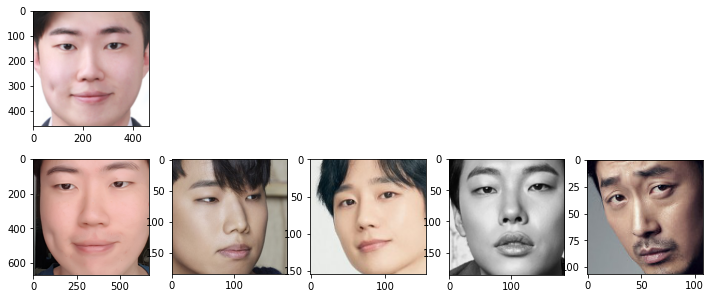

In [193]:
find_celebrity_resemblance('강석현')


순위 1 : 이름(강석현), 거리(0.327551743947548)
순위 2 : 이름(sechan), 거리(0.4228193574126911)
순위 3 : 이름(haein), 거리(0.4314796241476346)
순위 4 : 이름(jinho), 거리(0.446254707538795)
순위 5 : 이름(juneyul), 거리(0.46996367104338527)


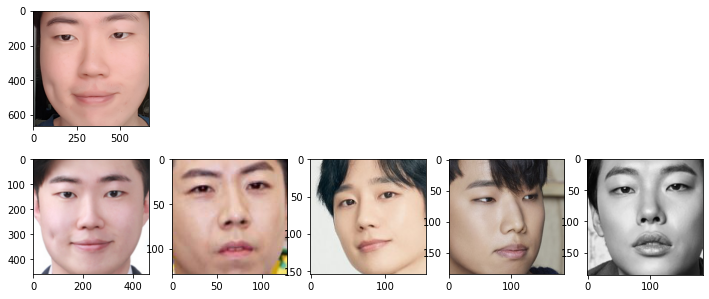

In [194]:
find_celebrity_resemblance('강석현2')

## 회고


- 에러 발생
********
IsADirectoryError: [Errno 21] Is a directory: '/aiffel/aiffel/face_embedding1/images/.ipynb_checkpoints'

**crop한 이미지들의 임베딩을 구하다가 발생한 문제**
 
 ***터미널에서 rm -r .ipynb_checkpoints를 해주어 해결.***
 *******

output : [] 

**강석현1.jpg 사진을 crop하여 임베딩을 했을때 결과값이 나오지 않았다.**
 
 ***사진의 화질이 좋지않아 인식을 했지만 임베딩이 안되기 때문에 강석현2.jpg로 대체.***
 **********************
 
- 결과
************************
*데이터들이 너무 적어서 범접할 수 없는 연예인들과 매칭이 되기에 **완전히 믿을 수 있는 결과**들은 아니었다.*

***외국 사람들과 수치적으로 많이 차이가 나기에 적당히 믿을 수 있는 결과이다.***

**분장** *을 한 사진을 넣어도 임베딩 벡터가 출력이 되는것이 놀랍다.*

*데이터의 다양성을 위해 색상이나 회전, 반전을 통해 다르게해도 같은 결과가 나올지 궁금하다.*

***(변형을 많이 준다면 인식을 못하거나, 조금 변형을 주었을때 거리가 작게 나올것 같다.)***

*나의 다른 사진을 넣었더니, **양세찬님**이 추가가 되었고, 순위만 조금씩 다르게 나온다.*



+ **flask를 활용해서 하고 싶었지만, 끝내 다루지 못해서 시간을 들여 좀 더 깊은 공부가 필요할 것 같다.** 